### <b> Brain Networks and Graphs - Assignment: </b>

##### Loading the files

In [65]:
import numpy as np

struct_labels = np.load('struct_labels.npy')
structural_matrix = np.load('structural_matrix.npy')


Aligning struct_labels to structural_matrix indices:

In [68]:
struct_labels = struct_labels.astype(int) - 1
struct_labels = np.sort(struct_labels)

In [69]:
np.shape(struct_labels)

(246,)

In [70]:
np.shape(structural_matrix)

(246, 246)

In [31]:
structural_matrix

array([[ 0,  2,  6, ...,  1,  0,  4],
       [ 2, 12, 12, ...,  0,  0,  0],
       [ 6, 12, 17, ...,  6,  3,  0],
       ...,
       [ 1,  0,  6, ...,  0,  1,  1],
       [ 0,  0,  3, ...,  1,  2,  1],
       [ 4,  0,  0, ...,  1,  1,  1]], dtype=int64)

Set the diagonal elements to zero to ignore self-connections:

In [71]:
np.fill_diagonal(structural_matrix, 0)

1. Computing node strength:

In [72]:
def calculate_node_strength(matrix) -> list[int]:
    return np.sum(matrix, axis=1)


In [73]:
node_strength = calculate_node_strength(structural_matrix)

Plotting an Histogram for node strength measure:

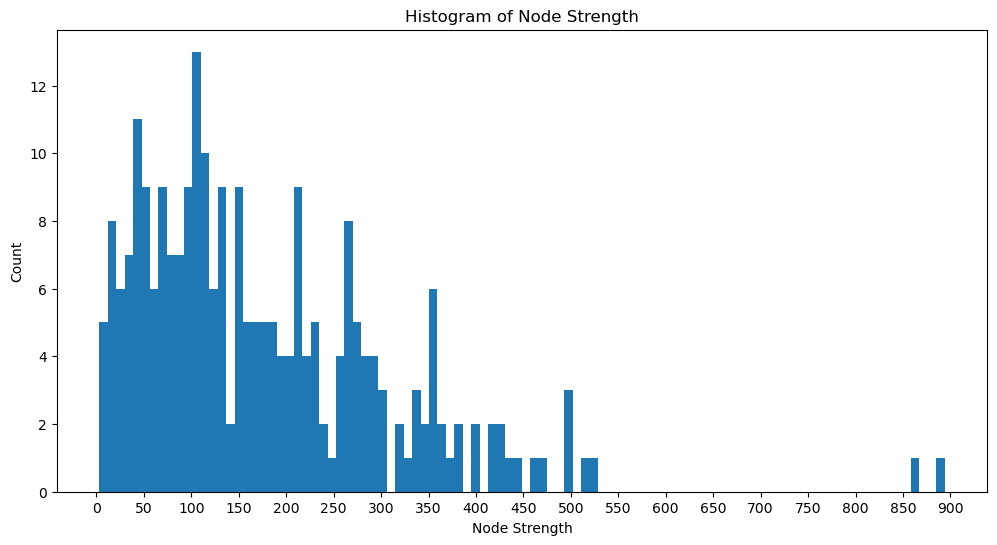

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(node_strength, bins= 100)
plt.title('Histogram of Node Strength')
plt.xlabel('Node Strength')
plt.ylabel('Count')

plt.xticks(np.arange(0, max(node_strength) + 50, 50))

plt.show()

In [74]:
def calculate_node_degree(matrix) -> list[int]:
    return np.sum(matrix > 0, axis=1)


In [75]:
node_degree = calculate_node_degree(structural_matrix)

Plotting an Histogram for node degree measure:

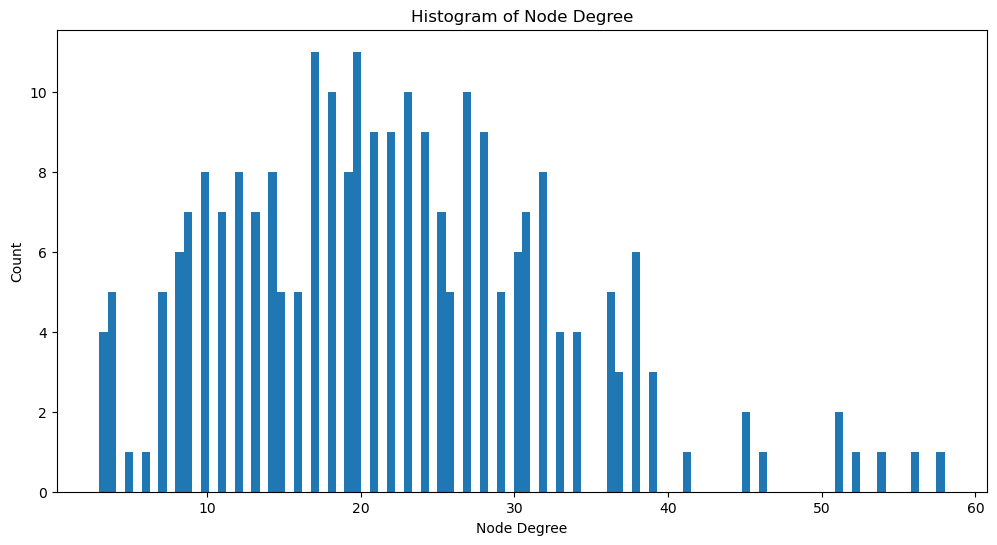

In [76]:
plt.figure(figsize=(12, 6))
plt.hist(node_degree, bins = 100)
plt.title('Histogram of Node Degree')
plt.xlabel('Node Degree')
plt.ylabel('Count')

plt.show()

2. Rich Club Coefficients:

In [92]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_rich_club_coefficient(matrix, k):
    degrees = np.sum(matrix > 0, axis=1)
    rich_nodes = np.where(degrees > k)[0]
    
    subgraph = matrix[np.ix_(rich_nodes, rich_nodes)]
    
    E_greater_k = np.sum(subgraph) / 2
    N_greater_k = len(rich_nodes)
    
    if N_greater_k < 2:
        return 0.0
    
    max_edges = N_greater_k * (N_greater_k - 1) / 2
    
    phi_k = (2 * E_greater_k) / (N_greater_k * (N_greater_k - 1))
    
    return phi_k

In [93]:
max_degree = np.max(node_degree)
rich_club_coefficients = [calculate_rich_club_coefficient(structural_matrix, k) for k in range(max_degree + 1)]


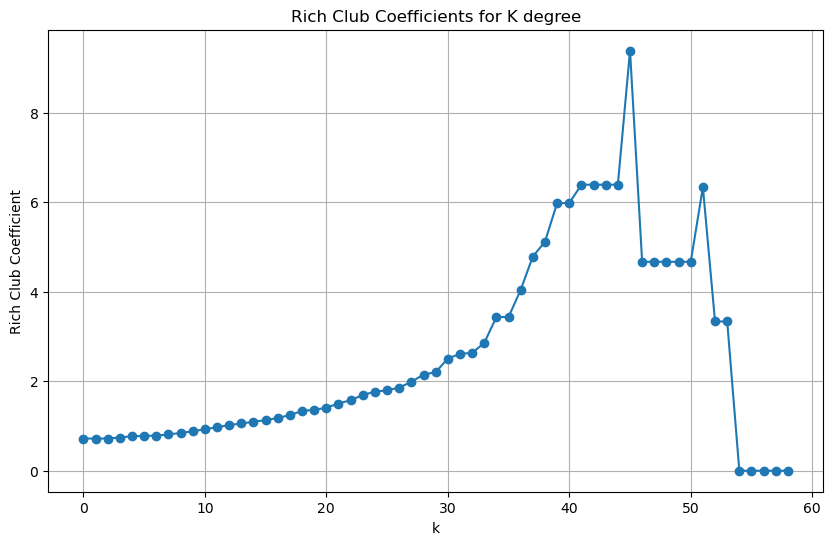

In [103]:
import matplotlib.pyplot as plt

k_values = range(max_degree + 1)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rich_club_coefficients, marker='o')
plt.xlabel('k')
plt.ylabel('Rich Club Coefficient')
plt.title('Rich Club Coefficients for K degree')
plt.grid(True)
plt.show()

3. K-Core:

In [99]:
def calculate_nodes_number_in_k_core(matrix, k):
    degrees = np.sum(matrix, axis=1)
    remaining_nodes = np.sum(degrees >= k)

    return remaining_nodes

In [101]:
node_counts = []

for k in k_values:
    nodes_num_in_k_core = calculate_nodes_number_in_k_core(structural_matrix, k)
    node_counts.append(nodes_num_in_k_core)

In [104]:
node_counts[-1]

200

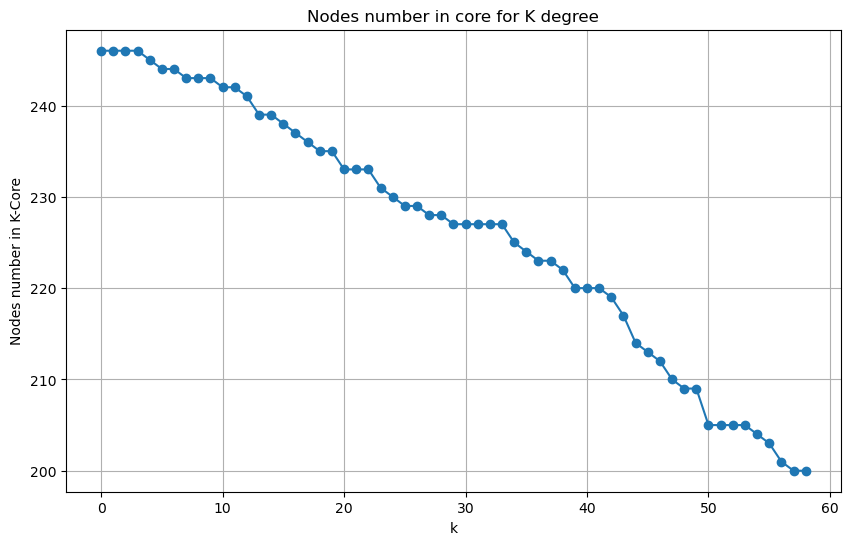

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, node_counts, marker='o')
plt.xlabel('k')
plt.ylabel('Nodes number in K-Core')
plt.title('Nodes number in core for K degree')
plt.grid(True)
plt.show()

4. Integration and segragation:

Integration - shortest path:

In [109]:
import networkx as nx

G = nx.from_numpy_array(structural_matrix)
shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G))

avg_path_lengths = []
for source, target_lengths in shortest_paths.items():
    node_path_lengths = []
    for target, length in target_lengths.items():
        if source != target:  # Exclude self-loops
            node_path_lengths.append(length)

    avg_path_lengths.append(np.mean(node_path_lengths))      

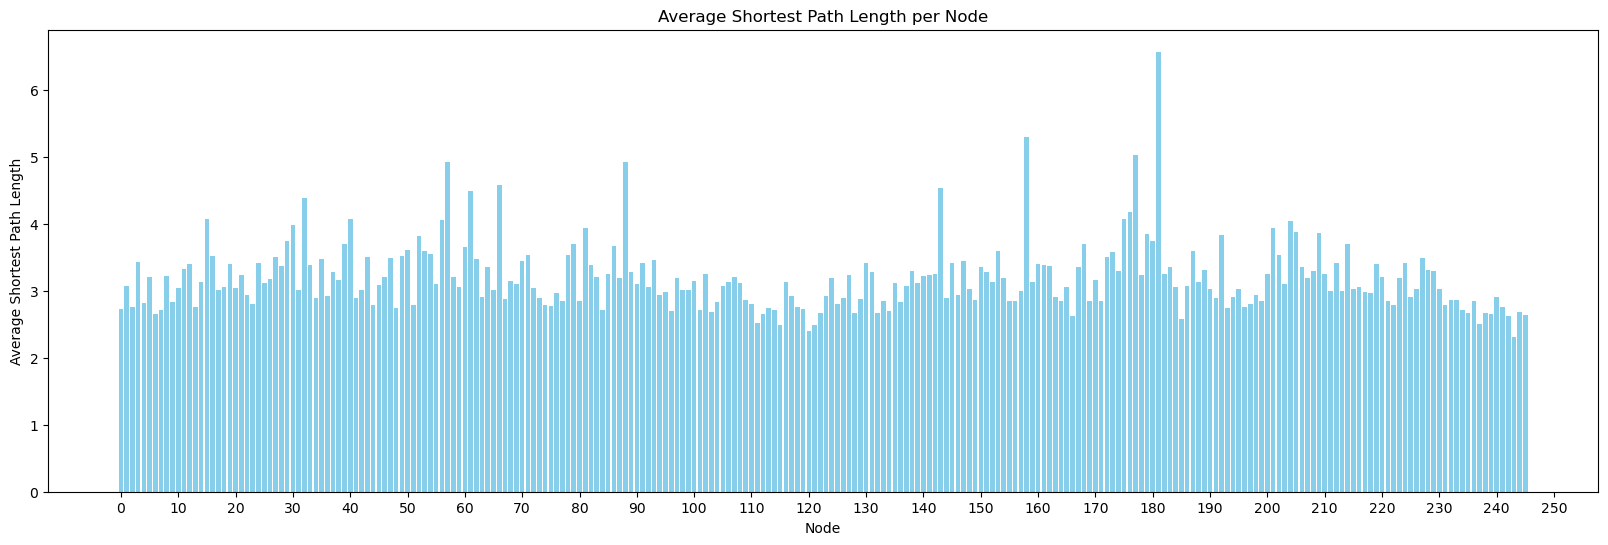

In [114]:
plt.figure(figsize=(20, 6))
plt.bar(range(len(avg_path_lengths)), avg_path_lengths, color='skyblue')
plt.xlabel('Node')
plt.ylabel('Average Shortest Path Length')
plt.title('Average Shortest Path Length per Node')
plt.xticks(np.arange(0, len(node_degree) + 10, 10))
plt.show()

Segragation: clustering coefficient

In [120]:
average_clustering_original = nx.average_clustering(G)

In [119]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
random_graph = nx.gnm_random_graph(num_nodes, num_edges)

average_clustering_random = nx.average_clustering(random_graph)


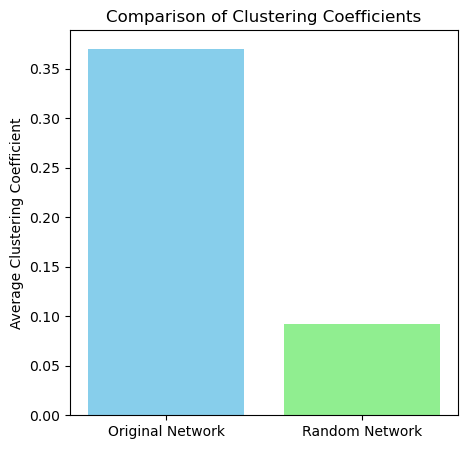

In [123]:
labels = ['Original Network', 'Random Network']
values = [average_clustering_original, average_clustering_random]

plt.figure(figsize=(5, 5))
plt.bar(labels, values, color=['skyblue', 'lightgreen'])
plt.ylabel('Average Clustering Coefficient')
plt.title('Comparison of Clustering Coefficients')
plt.show()

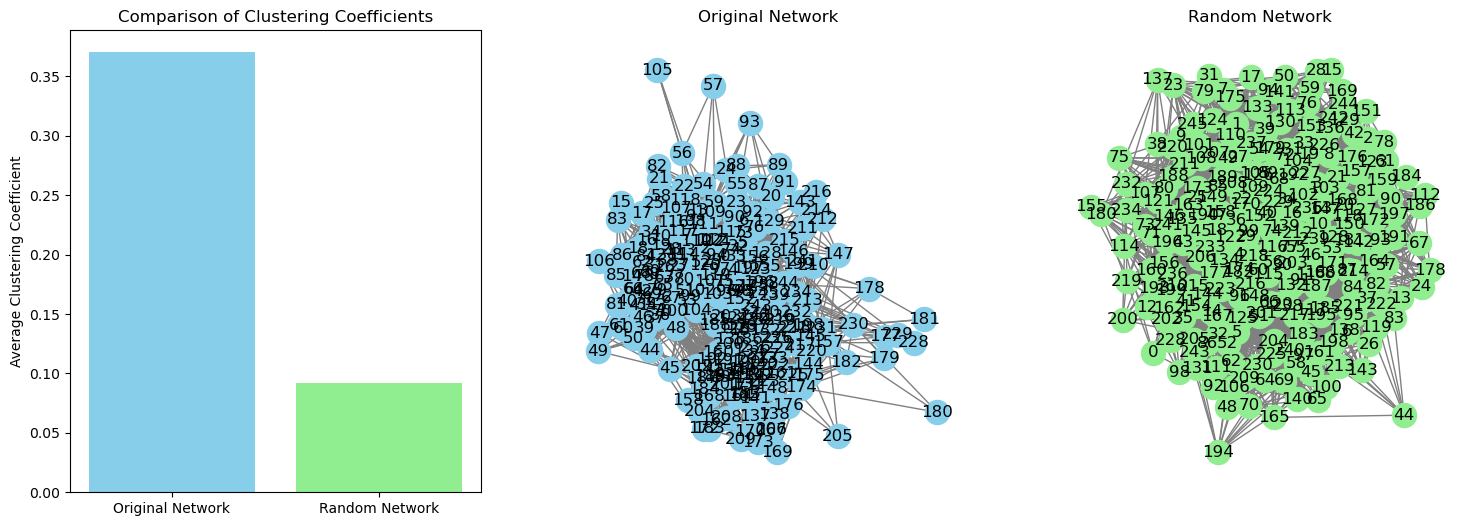

In [124]:
# Plotting the comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Bar chart for clustering coefficients
labels = ['Original Network', 'Random Network']
values = [average_clustering_original, average_clustering_random]
axs[0].bar(labels, values, color=['skyblue', 'lightgreen'])
axs[0].set_ylabel('Average Clustering Coefficient')
axs[0].set_title('Comparison of Clustering Coefficients')

# Plot original network
pos = nx.spring_layout(G)
nx.draw(G, pos, ax=axs[1], with_labels=True, node_color='skyblue', edge_color='gray')
axs[1].set_title('Original Network')

# Plot random network
pos_random = nx.spring_layout(random_graph)
nx.draw(random_graph, pos_random, ax=axs[2], with_labels=True, node_color='lightgreen', edge_color='gray')
axs[2].set_title('Random Network')

plt.show()

In [117]:
average_clustering

0.37012863572456434

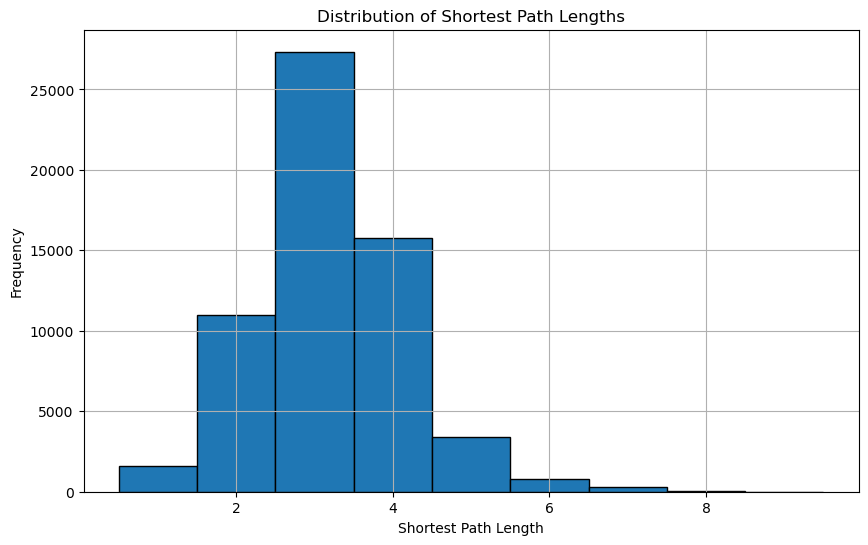

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(path_lengths, bins=range(1, max(path_lengths) + 2), edgecolor='black', align='left')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.title('Distribution of Shortest Path Lengths')
plt.grid(True)
plt.show()